# VectorField

Moduł zawierające funkcje umożliwiające wygodne symulowanie ruchu cząstki w **polu wektorowym**. 
Podstawową funkcjonalnością jest generowanie pola oraz obliczanie położenia poruszającego się obiektu. 
Dodatkowo moduł umożliwia wizualizację ruchu.

Autorzy: Mikołaj Langner, Marcin Miśkiewicz

##  Lista funkcji z krótkimi opisami:

* field - tworzy wykres pola wektorowego
* positions - oblicza pozycje obiektu poruszającego się wewnątrz pola
* trajectory - tworzy wykres trajektorii obiektu poruszającego się wewnątrz pola
* gradientField - tworzy wykres pola wektorowego z gradientu funkcji
* divergence - oblicza dywergencję pola w danym punkcie
* curl - oblicza rotację (wirowość) pola w danym punkcie
* animate - tworzy animacje cząstek poruszających się wewnątrz pola


In [1]:
# konfiguracja

include("vector_field.jl")
using .VectorField
using Makie.AbstractPlotting
AbstractPlotting.inline!(true)

# uwaga: jupyter notebook może pokazywać ostrzeżenie przy rysowaniu wykresów - brak dobrej integracji z biblioteką Makie

false

## 1. field

In [4]:
? field

search: field fieldtype fieldname fieldtypes fieldnames fieldcount fieldoffset



```
field(Fx::Function, Fy::Function; kwargs...)
```

Plot a vector field of two-variable functions.

# Arguments

  * `xbounds::Tuple{Real, Real} = (-1, 1)`: boundaries for x coordinates.
  * `ybounds::Tuple{Real, Real} = (-1, 1)`: boundaries for y coordinates.

---

```
field(Fx::Function, Fy::Function, Fz::Function; kwargs...)
```

Also for three-variable functions.

# Arguments

  * `zbounds::Tuple{Real, Real} = (-1, 1)`: boundaries for z coordinates.


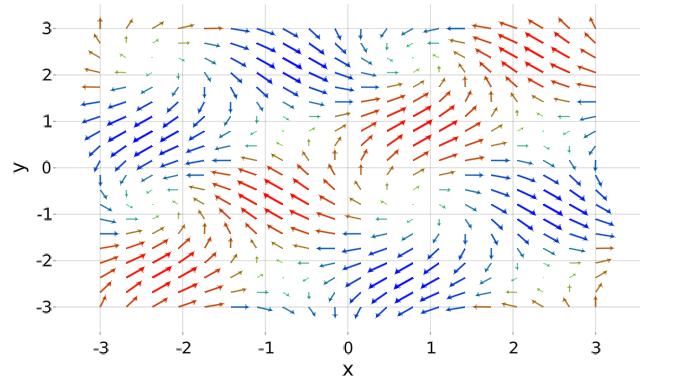

┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting C:\Users\marci_000\.julia\packages\AbstractPlotting\jOgYQ\src\display.jl:135


In [6]:
# przykład pola 2D

field((x, y)->sin(x+y), (x, y)->cos(x-y), xbounds=(-3, 3), ybounds=(-3, 3))

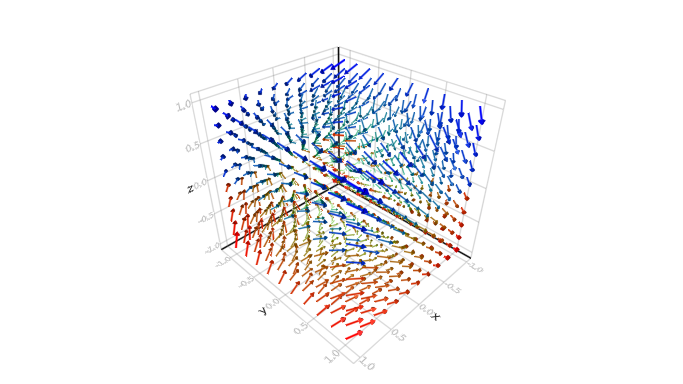

┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting C:\Users\marci_000\.julia\packages\AbstractPlotting\jOgYQ\src\display.jl:135


In [7]:
# przykład pola 3D
field((x, y, z)->-x, (x, y, z)->y, (x, y, z)->-z)

## 2. positions

In [8]:
? positions

search: positions position mouseposition mouse_position CompositeException



```
positions(Fx::Function, Fy::Function, startPoint::Array{T, 1} = [0, 0]; kwargs...) where T <: Real
```

Compute positions of an object for vector field of given two-variable functions.

# Arguments

  * `time::Tuple{Real, Real} = (0, 1)`: boundaries for time which positions will be computed in.
  * `timePoints::Integer = 100`: number of positions (accuracy) to compute.

---

```
positions(Fx::Function, Fy::Function, Fz::Function, startPoint::Array{T, 1} = [0, 0, 0]; kwargs...) where T <: Real
```

Also for three-variable functions.


In [13]:
# przykład dla pola 2D
X1, Y1 = positions((x, y)->x, (x, y)->x*y, [4, 2], time=(0, 1))

println(X1[end]) # końcowa współrzędna x cząstki
println(Y1[end]) # końcowa współrzędna y cząstki

10.87312731799792
1931.207287563505


In [14]:
# przykład dla pola 3D
X2, Y2, Z2 = positions((x, y, z)->x, (x, y, z)->x*y, (x, y, z)->z-y-x, [4, 2, 2], time=(0, 1))

println(X2[end]) # końcowa współrzędna x cząstki
println(Y2[end]) # końcowa współrzędna y cząstki
println(Z2[end]) # końcowa współrzędna y cząstki

10.873127317218387
1931.4637103731802
-229.49872632467992


In [20]:
# dane można dalej analizować
println(max(Z2...))

2.0
